## multioutput_face_completion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=12)

from sklearn import preprocessing
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
#自己加入
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split


In [2]:
#loading face dataset
data, targets= fetch_olivetti_faces(return_X_y=True)

train =data[targets < 30]
test = data[targets >= 30]

In [6]:
# Test on a subset of people
n_faces=5
rng= check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
#上半部臉
X_train = train[:, :(n_pixels+1)//2]
#下半部臉
y_train =train[:, n_pixels//2:]
X_test = test[:, :(n_pixels+1)//2]
y_test= test[:, n_pixels//2:]

#fit estimators
ESTIMATORS={
    "Extra trees":ExtraTreesRegressor(n_estimators=10, max_features=32,
                                      random_state=0 ),
    "Knn":KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    #額外regression
    "Decision tree" : DecisionTreeRegressor(max_depth=10, random_state=0),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] =estimator.predict(X_test)

## 繪製完整臉譜

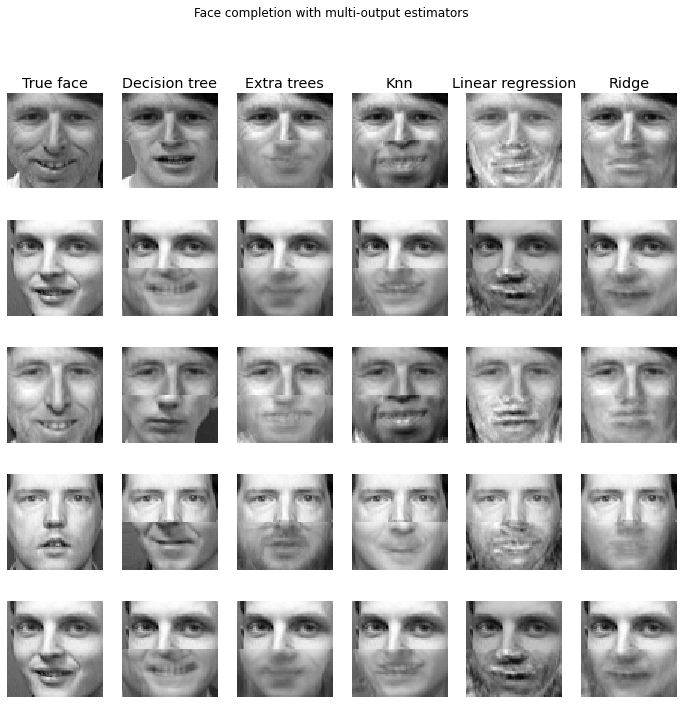

In [7]:
image_shape=(64,64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle('Face completion with multi-output estimators', size=12)

for i in range(n_faces):
    true_face= np.hstack((X_test[i], y_test[i]))
    if i:
        sub= plt.subplot(n_faces, n_cols, i * n_cols +1)
    else:
        sub= plt.subplot(n_faces, n_cols, i * n_cols +1, title='True face')
        
    sub.axis('off')
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
    
    for j, esti in enumerate(sorted(ESTIMATORS)):
        completed_face= np.hstack((X_test[i], y_test_predict[esti][i]))
        if i:
            sub= plt.subplot(n_faces, n_cols, i* n_cols+2+j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=esti)
        
        sub.axis('off')
        sub.imshow(completed_face.reshape(image_shape),cmap=plt.cm.gray, interpolation='nearest')

plt.show()